# trim_saddle_points

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage
ps.visualization.set_mpl_style()

## Create image and variables

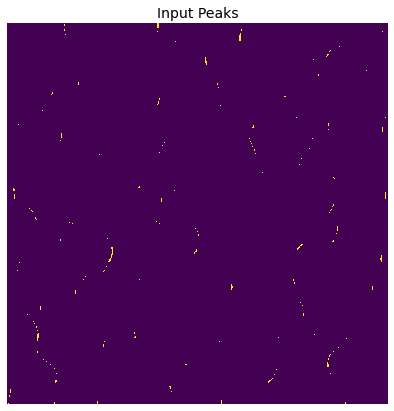

In [2]:
im = ps.generators.blobs(shape=[500, 500])
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
r_max = 4
footprint = None
peaks = ps.filters.find_peaks(dt, r_max=4, footprint=None)
plt.figure(figsize=[7,7])
plt.axis(False)
plt.title('Input Peaks')
plt.imshow(peaks)

#default values:
max_iters=10
verbose=1

## Apply filter function

### max_iters

2021-04-08 15:10:48 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-04-08 15:10:48 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-04-08 15:10:48 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-04-08 15:10:49 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-04-08 15:10:49 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number of iterations reached, consider running again with a larger value of max_iters
2021-04-08 15:10:49 | WARNING  | porespy.filters.__funcs__:trim_saddle_points:585
--> Maximum number

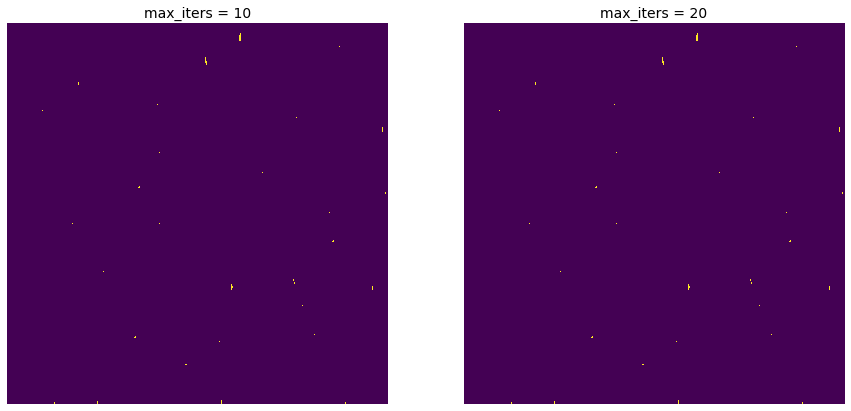

In [3]:
x = ps.filters.trim_saddle_points(peaks=peaks, dt=dt, max_iters=max_iters)
xx = ps.filters.trim_saddle_points(peaks=peaks, dt=dt, max_iters=20)

fig, ax = plt.subplots(1, 2, figsize=[15, 15]);
ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('max_iters = 10')
ax[1].set_title('max_iters = 20');